### Call necessay libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [6]:
train = pd.read_csv('Shopping.csv')
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


# 1. Checking the data
* First, check the data. We can find that there are both numerical and categorical data.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

### After checking the null values, we can find that ' Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome' columns have null values.

In [22]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

### In Gender column, there are 'Female' and 'Fe Male'. In MaritalStatus column, there are 'Single' and 'Unmarried' and they mean the same. Each values will be calculated.

In [23]:
print(train['Gender'].unique())
print(train['MaritalStatus'].unique())
print(train['Gender'].value_counts())
print(train['MaritalStatus'].value_counts())

['Male' 'Female' 'Fe Male']
['Married' 'Single' 'Divorced' 'Unmarried']
Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64
Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64


###  Minor values (Fe Male and Unmarried) will be changed to major values (Female, Single).

In [24]:
train['Gender'].replace({'Fe Male': 'Female'}, inplace=True)
train['MaritalStatus'].replace({'Unmarried': 'Single'}, inplace=True)

### Additionally, new column 'AgeGroup' will be created to analyze the continuos 'Age' data easily.

In [25]:
train['AgeGroup']='NONE'
train.loc[train['Age'] < 20,'AgeGroup']='Under 20'
train.loc[(train['Age'] >= 20) & (train['Age'] < 30),'AgeGroup']='20~29'
train.loc[(train['Age'] >= 30) & (train['Age'] < 40),'AgeGroup']='30~39'
train.loc[(train['Age'] >= 40) & (train['Age'] < 50),'AgeGroup']='40~49'
train.loc[(train['Age'] >= 50) & (train['Age'] < 60),'AgeGroup']='50~59'
train.loc[(train['Age'] >= 60) & (train['Age'] < 70),'AgeGroup']='60~69'
train.loc[(train['Age'] >= 70) & (train['Age'] < 80),'AgeGroup']='70~79'
train.loc[(train['Age'] >= 80) ,'AgeGroup']='Over 80'

### use describe() to view each columns's mean, max, min and others.

In [26]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


# 2. Checking the Distribution and Outliers
### Before filling up the null values, check the numerical data distribution. Therefore, null values can be filled in more appropriately.
* MonthlyIncome and NumberOfTrips seem to have outliers.

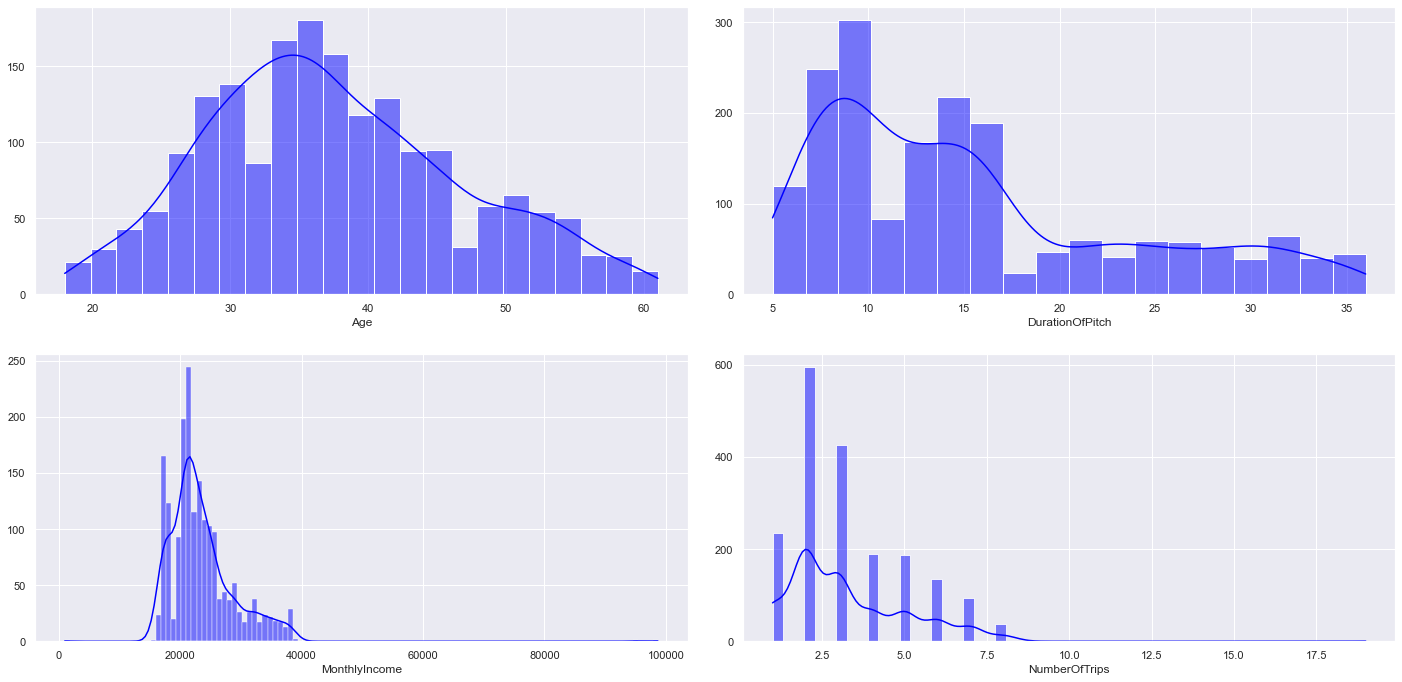

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.set(font_scale=2)
sns.histplot(x=train['Age'],kde=True,ax=axes[0][0], color='blue')
sns.histplot(x=train['DurationOfPitch'],kde=True,ax=axes[0][1], color='blue')
sns.histplot(x=train['MonthlyIncome'],kde=True,ax=axes[1][0], color='blue')
sns.histplot(x=train['NumberOfTrips'],kde=True,ax=axes[1][1], color='blue')

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel=None)

plt.tight_layout()
plt.show()

* Age: Majority of them are 30~40s.
* DurationOfPitch: Majority of them are 5~15.
* MonthlyIncome: Majority of them are 20000~25000.
* NumberOfTrips: On average, there are 2~3 trips.

### To visualize outlier of each columns, Boxplot is plotted.

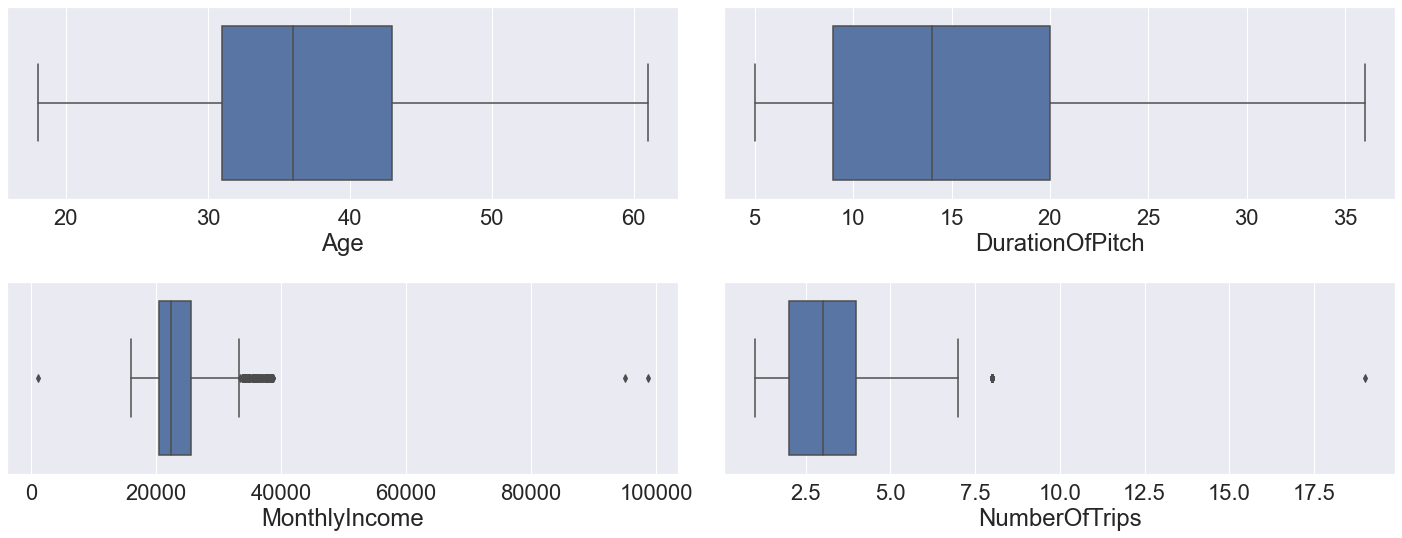

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(20,8))

sns.boxplot(x=train['Age'],ax=axes[0][0])
sns.boxplot(x=train['DurationOfPitch'],ax=axes[0][1])
sns.boxplot(x=train['MonthlyIncome'],ax=axes[1][0])
sns.boxplot(x=train['NumberOfTrips'],ax=axes[1][1])

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel=None)

plt.tight_layout()
plt.show()

* Certainly, there are outliers in MonthlyIncome that are near to 0 and 100000.
* There is an outlier in NumberOfTrips too.

### Now, lets look at Violinplot.

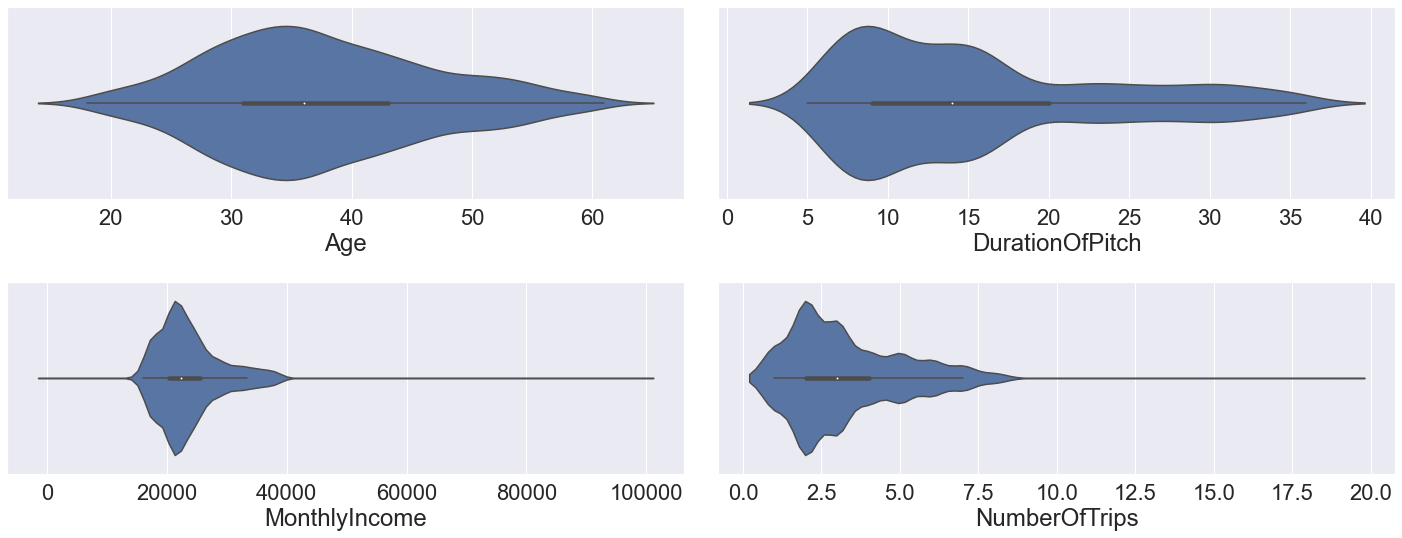

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(20,8))

sns.violinplot(x=train['Age'],ax=axes[0][0])
sns.violinplot(x=train['DurationOfPitch'],ax=axes[0][1])
sns.violinplot(x=train['MonthlyIncome'],ax=axes[1][0])
sns.violinplot(x=train['NumberOfTrips'],ax=axes[1][1])

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel=None)

plt.tight_layout()
plt.show()

* Outliers can be seen clearly.

## Comparing categorical data.

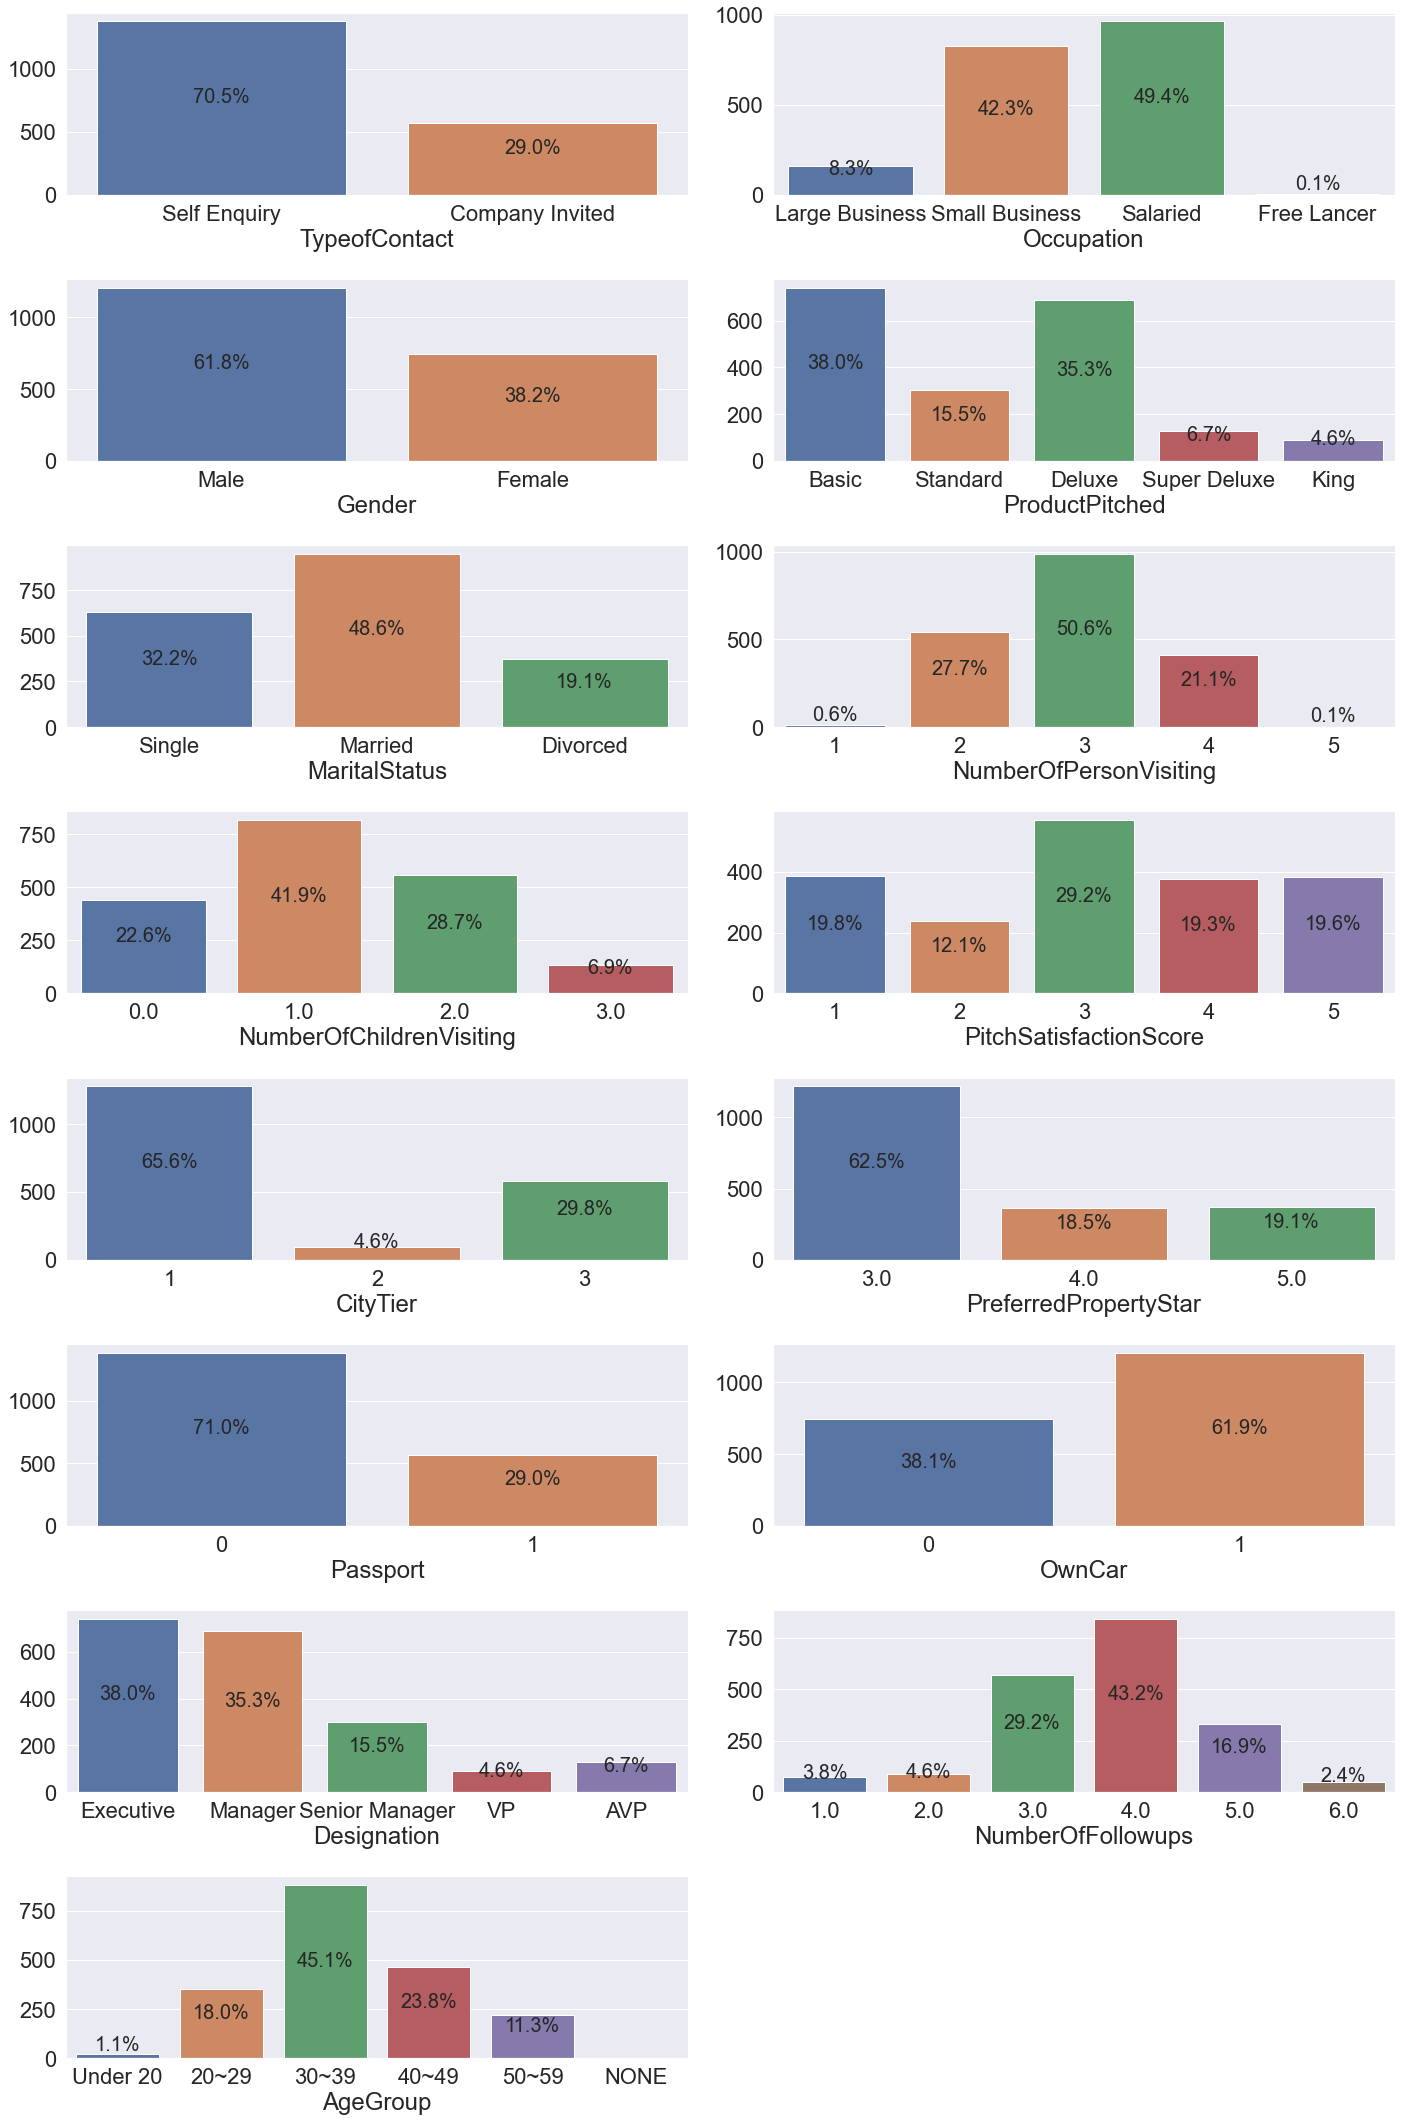

In [45]:
fig, axes = plt.subplots(8, 2, figsize=(20,30))

# bar order
order1 = ['Self Enquiry','Company Invited']
order2 = ['Large Business','Small Business','Salaried','Free Lancer']
order3 = ['Male','Female']
order4 = ['Basic','Standard','Deluxe','Super Deluxe','King']
order5 = ['Single','Married','Divorced']
order6 = ['Executive','Manager','Senior Manager','VP','AVP']
order7 = ['Under 20','20~29','30~39','40~49','50~59','NONE']

sns.countplot(x='TypeofContact', data=train, ax=axes[0][0],order=order1)
sns.countplot(x='Occupation', data=train, ax=axes[0][1],order=order2)
sns.countplot(x='Gender', data=train, ax=axes[1][0],order=order3)
sns.countplot(x='ProductPitched', data=train, ax=axes[1][1],order=order4)
sns.countplot(x='MaritalStatus', data=train, ax=axes[2][0],order=order5)
sns.countplot(x='NumberOfPersonVisiting', data=train, ax=axes[2][1])
sns.countplot(x='NumberOfChildrenVisiting', data=train, ax=axes[3][0])
sns.countplot(x='PitchSatisfactionScore', data=train, ax=axes[3][1])
sns.countplot(x='CityTier', data=train, ax=axes[4][0])
sns.countplot(x='PreferredPropertyStar', data=train, ax=axes[4][1])
sns.countplot(x='Passport', data=train, ax=axes[5][0])
sns.countplot(x='OwnCar', data=train, ax=axes[5][1])
sns.countplot(x='Designation', data=train, ax=axes[6][0],order=order6)
sns.countplot(x='NumberOfFollowups', data=train, ax=axes[6][1])
sns.countplot(x='AgeGroup', data=train, ax=axes[7][0],order=order7)

for i in np.arange(0,8):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel=None)
        total = len(train)
        patches = axes[i][j].patches
        for p in axes[i][j].patches:
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()/2
            axes[i][j].annotate(percentage, (x, y), ha='center', va='center',fontsize=20)

fig.delaxes(axes[7][1])
plt.tight_layout()
plt.show()

### Other Insights:
* TypeofContact: Self Inquiry is twice more than Company Invited.
* Occupation: Salaried, Small Business, Large Business, and Free Lancer are the most common. Free Lancers are very few.
* Gender: Males were more than twice as likely as females.
* ProductPitched:Basic, Delux, Standard, Super Delux, and King are the most common. The difference between Basic and Deluxe is small.
* MaritalStatus:Married, Single, and Divorced are the most common, and they seem to be related to family travel and couple travel.
* CityTier: Grade 1 is the most, and Grade 2 is very low..
* NumberOfPersonVisiting: Three are the most, followed by two. I guess it's probably a family of three and a couple. 1 and 5 are very few.
* NumberOfChildrenVisiting: 1 is the most. Maybe it has something to do with the family of three.
* PitchSatisfactionScore: An average of 3 is the most common.
* PreferredPropertyStar: Grade 3 is the most common. Grades 4 and 5 are similar.
* Passport: Most people do not have passports. The number of non-passport holders is twice that of passport holders.
* OwnCar: Most people own cars. Car owners are almost twice as many as non-car owners.
* Designation: Executives, Managers, Senior Managers, AVPs, and VPs are the most common, with AVPs slightly more than VPs.
* NumberOfFollowups: 4 times, 3 times, 5 times in that order.
* AgeGroup: Most of them are in their 30s, followed by those in their 40s and 20s. There are very few people under the age of 20. NONE is a missing value and will be dealt with later.

# 3. Handling Missing Values
 * Age: It shows a normal distribution. Therefore, we will fill in the missing values with the mean value.
 * TypeOfContact:It is too ambiguous to fill missing values with specific values. So let's fill it with the new value 'Unknown'.
 * DurationOfPitch: There are extreme outliers, and it seems unreasonable to fill them with averages. So we'll fill it with the median, which is the median.
 * NumberOfFollowups: Let's fill it with 4 which is near the mean.
 * PreferredPropertyStar: Let's fill it with 3 which is near the mean.
 * NumberOfTrips: Since outliers exist, we will fill them with the median.
 * NumberOfChildrenVisiting: We will fill the missing values with zeros. (Assuming no children)
 * MonthlyIncome: Since the missing values are significant, it was judged inappropriate to fill them with the average. So let's fill it with median.
 * AgeGroup: After handling the missing value of Age, set the AgeGroup again.
 * We will remove missing values for smooth visualization.

In [31]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['TypeofContact'].fillna('Unknown', inplace=True)
train['DurationOfPitch'].fillna(train['DurationOfPitch'].median(), inplace=True)
train['NumberOfFollowups'].fillna(4, inplace=True)
train['PreferredPropertyStar'].fillna(3, inplace=True)
train['NumberOfTrips'].fillna(train['NumberOfTrips'].median(), inplace=True)
train['NumberOfChildrenVisiting'].fillna(0, inplace=True)
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)

train.loc[train['Age'] < 20,'AgeGroup']='Under 20'
train.loc[(train['Age'] >= 20) & (train['Age'] < 30),'AgeGroup']='20~29'
train.loc[(train['Age'] >= 30) & (train['Age'] < 40),'AgeGroup']='30~39'
train.loc[(train['Age'] >= 40) & (train['Age'] < 50),'AgeGroup']='40~49'
train.loc[(train['Age'] >= 50) & (train['Age'] < 60),'AgeGroup']='50~59'
train.loc[(train['Age'] >= 60) & (train['Age'] < 70),'AgeGroup']='60~69'
train.loc[(train['Age'] >= 70) & (train['Age'] < 80),'AgeGroup']='70~79'
train.loc[(train['Age'] >= 80) ,'AgeGroup']='Over 80'

# Remove Outliers 
train.drop(train[train.MonthlyIncome < 1100].index, inplace=True)
train.drop(train[train.MonthlyIncome > 80000 ].index, inplace=True)
train.drop(train[train.NumberOfTrips > 15 ].index, inplace=True)

# 4. Target Value Distribution
* The number of people who did not apply is five times greater than the number of people who applied.
* Since there is a difference in the target value, it can be viewed as imbalanced data. In that case, we can consider over-sampling / under-sampling in classification prediction.

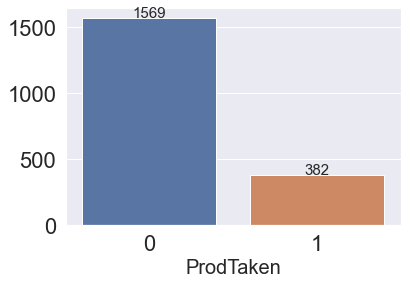

In [32]:
target = sns.countplot(x='ProdTaken', data=train)
target.set(ylabel=None)
target.set_xlabel("ProdTaken", fontsize = 20)
target.set_ylabel("", fontsize = 20)
for p in target.patches:
    height = p.get_height()
    target.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 15)

plt.show()

# 5. Analysis of ProdTaken
### Our goal is to find out which customers have requested more products. Therefore, let's gain additional insight by visualizing whether each feature is ProdTaken or not. Let's start with numerical data. (0: not applied 1: applied)

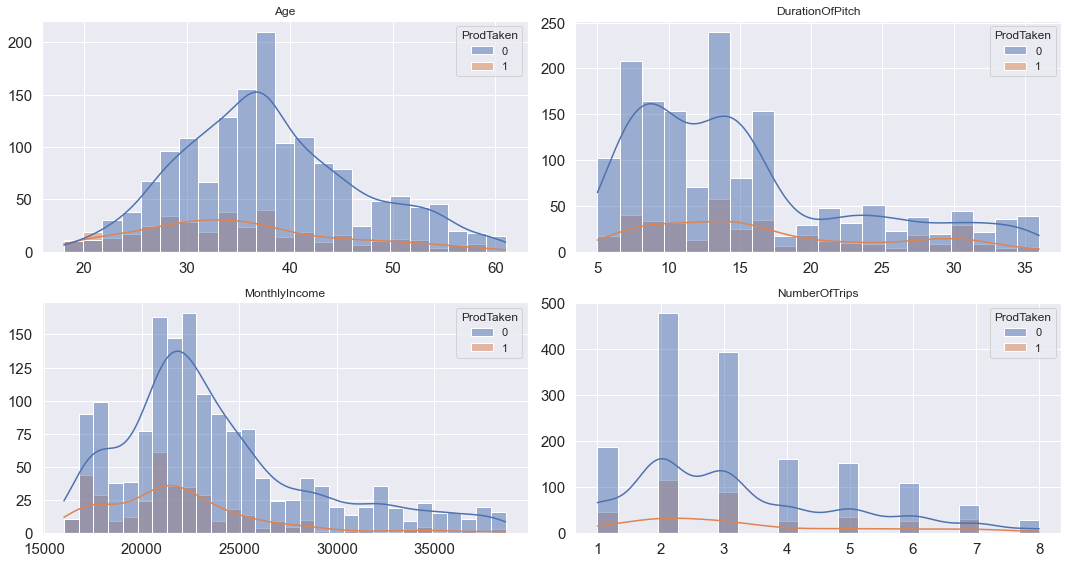

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))

sns.set(font_scale=1)
sns.histplot(x=train['Age'],kde=True,hue=train['ProdTaken'],ax=axes[0][0]).set(title='Age')
sns.histplot(x=train['DurationOfPitch'],kde=True,hue=train['ProdTaken'],ax=axes[0][1]).set(title='DurationOfPitch')
sns.histplot(x=train['MonthlyIncome'],kde=True,hue=train['ProdTaken'],ax=axes[1][0]).set(title='MonthlyIncome')
sns.histplot(x=train['NumberOfTrips'],kde=True,hue=train['ProdTaken'],ax=axes[1][1]).set(title='NumberOfTrips')

for i in np.arange(0,2):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel=None)
        axes[i][j].set(xlabel=None)
        axes[i][j].tick_params(labelsize=15)

plt.tight_layout()
plt.show()

* Age: As more data for 30~40s were collected, the number of applications was higher than that of other age groups. However, when I saw it as a percentage of whether or not to apply, the under 20s and 20s are overwhelming.
* DurationOfPitch: Periods of 5 to 15 induced the most applications. However, it accounts for the largest percentage, and in terms of the application rate, the period in the early 20 and early 30 is the highest.
* MonthlyIncome: The application rate from 15000 to 23000 seems to be the highest. If it exceeds 30000, of course there is less data, but the application rate is very low.
* NumberOfTrips: Those who have traveled 2-3 times have the highest rate of product application.

### Next, let's check whether the categorical data for ProdTaken.

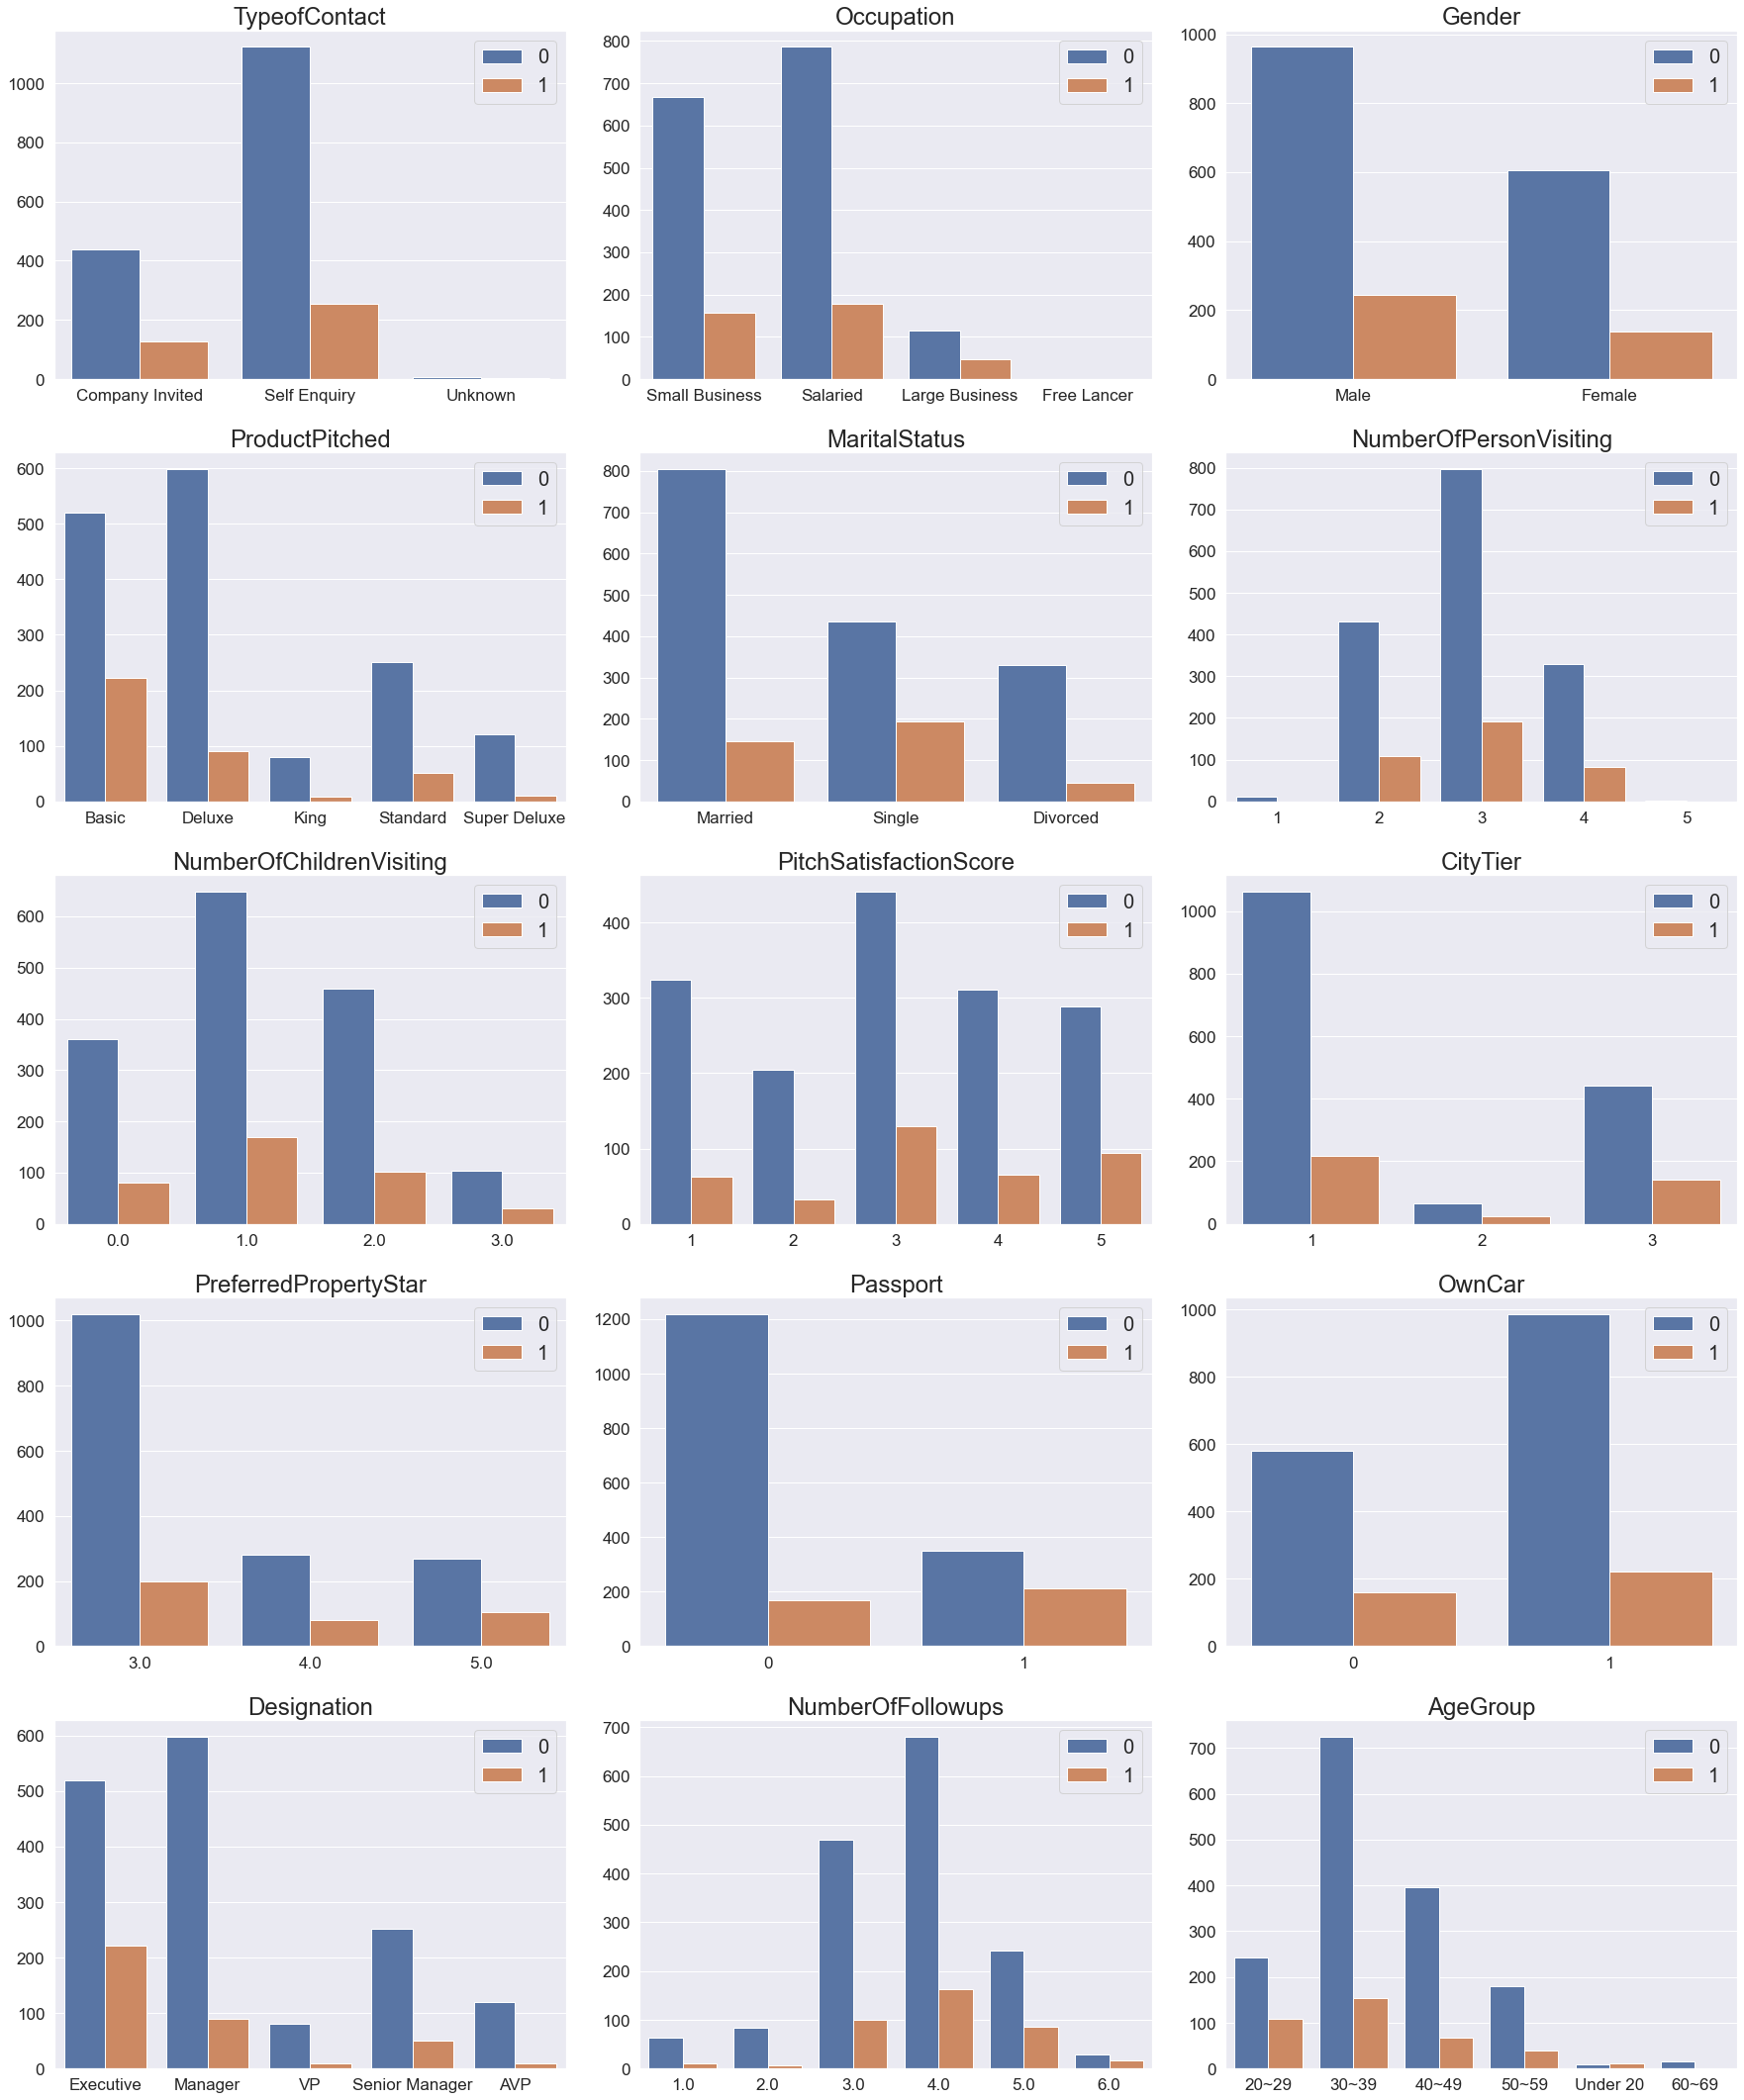

In [34]:
fig, axes = plt.subplots(5, 3, figsize=(25,30))

sns.set(font_scale=2)
sns.countplot(x='TypeofContact',hue=train['ProdTaken'], data=train, ax=axes[0][0]).set(title='TypeofContact')
sns.countplot(x='Occupation',hue=train['ProdTaken'], data=train, ax=axes[0][1]).set(title='Occupation')
sns.countplot(x='Gender',hue=train['ProdTaken'], data=train, ax=axes[0][2]).set(title='Gender')
sns.countplot(x='ProductPitched',hue=train['ProdTaken'], data=train, ax=axes[1][0]).set(title='ProductPitched')
sns.countplot(x='MaritalStatus',hue=train['ProdTaken'], data=train, ax=axes[1][1]).set(title='MaritalStatus')
sns.countplot(x='NumberOfPersonVisiting',hue=train['ProdTaken'], data=train, ax=axes[1][2]).set(title='NumberOfPersonVisiting')
sns.countplot(x='NumberOfChildrenVisiting',hue=train['ProdTaken'], data=train, ax=axes[2][0]).set(title='NumberOfChildrenVisiting')
sns.countplot(x='PitchSatisfactionScore',hue=train['ProdTaken'], data=train, ax=axes[2][1]).set(title='PitchSatisfactionScore')
sns.countplot(x='CityTier',hue=train['ProdTaken'], data=train, ax=axes[2][2]).set(title='CityTier')
sns.countplot(x='PreferredPropertyStar',hue=train['ProdTaken'], data=train, ax=axes[3][0]).set(title='PreferredPropertyStar')
sns.countplot(x='Passport',hue=train['ProdTaken'], data=train, ax=axes[3][1]).set(title='Passport')
sns.countplot(x='OwnCar',hue=train['ProdTaken'], data=train, ax=axes[3][2]).set(title='OwnCar')
sns.countplot(x='Designation',hue=train['ProdTaken'], data=train, ax=axes[4][0]).set(title='Designation')
sns.countplot(x='NumberOfFollowups',hue=train['ProdTaken'], data=train, ax=axes[4][1]).set(title='NumberOfFollowups')
sns.countplot(x='AgeGroup',hue=train['ProdTaken'], data=train, ax=axes[4][2]).set(title='AgeGroup')

for i in np.arange(0,5):
    for j in np.arange(0,3):
        axes[i][j].set(ylabel=None)
        axes[i][j].set(xlabel=None)
        axes[i][j].tick_params(labelsize=17)
        axes[i][j].legend(loc='upper right',fontsize='20')


plt.tight_layout()
plt.show()

* TypeofContact: There are more customers who applied for Self-Inquiry, but it seems that there were many rejections as well.
* Occupation: It does not seem to have a significant effect on whether or not to apply for products by occupation. However, Salaried seems to do quite a bit of product rejection.
* Gender: Men are counted more, showing a higher number of applications. The gender application rates look similar.
* ProductPitched: Even though Basic has fewer totals than Deluxe, it shows a higher application rate. Standard also shows a compliant application rate compared to Deluxe, and the total number of applications and application rate are low for King and Super Delux..
* MaritalStatus: Married people have the most data, but unmarried people have a higher application rate.
* NumberOfPersonVisiting: It doesn't seem to have a significant impact on ProdTaken. 3 is the most, but there were a lot of rejections as well.
* NumberOfChildrenVisiting: Likewise, it has no significant impact on ProdTaken.
* PitchSatisfactionScore: Similarly, it has no significant impact on ProdTaken. The highest 3-point and 5-point application rates are relatively compliant.
* CityTier: Grade 1 is the most common, but in terms of application rate, Grade 2 is the most compliant
* PreferredPropertyStar: Grade 3 is the most common, but the application rate is very low compared to other grades, and the application rate for Grade 5 is the highest.
* Passport: Passports showed very significant results, with a very large number of non-passport holders but a very low application rate, and a very high application rate despite a small number of passport holders. Therefore, it can be seen that whether or not customer has a passport plays a big role in applying for travel products.
* OwnCar: Conversely, car ownership did not have a significant effect. There were many car owners, but the product application rate was similar to those without a car.
* Designation: The designation also shows significant results, with Executives showing a higher application rate than Managers, even though they have fewer numbers. VP and AVP have very low application rates
* NumberOfFollowups: The number of follow-ups after presentation also shows significant results. 1 to 4 do not make a big contribution to the application rate, but the application rate increases from the 5th. In particular, the number of people who go up to number 6 is small, but it shows a very high application rate.
* AgeGroup: A relatively high application rate is seen in the 20s, and it seems difficult to expect a high application rate from the 40s and older.

### When we visualize the number of customers as above, we can see how customers perceive the product and how many people they visit with and many more. However, it is difficult to see application rates for each category. From now on, let's change each category to 100%, not the number of customers, to see which category has the highest application rate.

* For example, if 100 out of 1000 apply, there are many customers who apply, but the application rate is 10%, whereas if 8 out of 10 apply, the number of customers who apply is small, but the application rate is 80%. We will see which category is more efficient.

In [35]:
df = train.groupby('TypeofContact')['ProdTaken'].value_counts(normalize=True)
df = df.mul(100).rename('percent').reset_index()

df1 = train.groupby('Occupation')['ProdTaken'].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent1').reset_index()

df2 = train.groupby('Gender')['ProdTaken'].value_counts(normalize=True)
df2 = df2.mul(100).rename('percent2').reset_index()

df3 = train.groupby('ProductPitched')['ProdTaken'].value_counts(normalize=True)
df3 = df3.mul(100).rename('percent3').reset_index()

df4 = train.groupby('MaritalStatus')['ProdTaken'].value_counts(normalize=True)
df4 = df4.mul(100).rename('percent4').reset_index()

df5 = train.groupby('NumberOfPersonVisiting')['ProdTaken'].value_counts(normalize=True)
df5 = df5.mul(100).rename('percent5').reset_index()

df6 = train.groupby('NumberOfChildrenVisiting')['ProdTaken'].value_counts(normalize=True)
df6 = df6.mul(100).rename('percent6').reset_index()

df7 = train.groupby('PitchSatisfactionScore')['ProdTaken'].value_counts(normalize=True)
df7 = df7.mul(100).rename('percent7').reset_index()

df8 = train.groupby('CityTier')['ProdTaken'].value_counts(normalize=True)
df8 = df8.mul(100).rename('percent8').reset_index()

df9 = train.groupby('PreferredPropertyStar')['ProdTaken'].value_counts(normalize=True)
df9 = df9.mul(100).rename('percent9').reset_index()

df10 = train.groupby('Passport')['ProdTaken'].value_counts(normalize=True)
df10 = df10.mul(100).rename('percent10').reset_index()

df11 = train.groupby('OwnCar')['ProdTaken'].value_counts(normalize=True)
df11 = df11.mul(100).rename('percent11').reset_index()

df12 = train.groupby('Designation')['ProdTaken'].value_counts(normalize=True)
df12 = df12.mul(100).rename('percent12').reset_index()

df13 = train.groupby('NumberOfFollowups')['ProdTaken'].value_counts(normalize=True)
df13 = df13.mul(100).rename('percent13').reset_index()

df14 = train.groupby('AgeGroup')['ProdTaken'].value_counts(normalize=True)
df14 = df14.mul(100).rename('percent14').reset_index()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


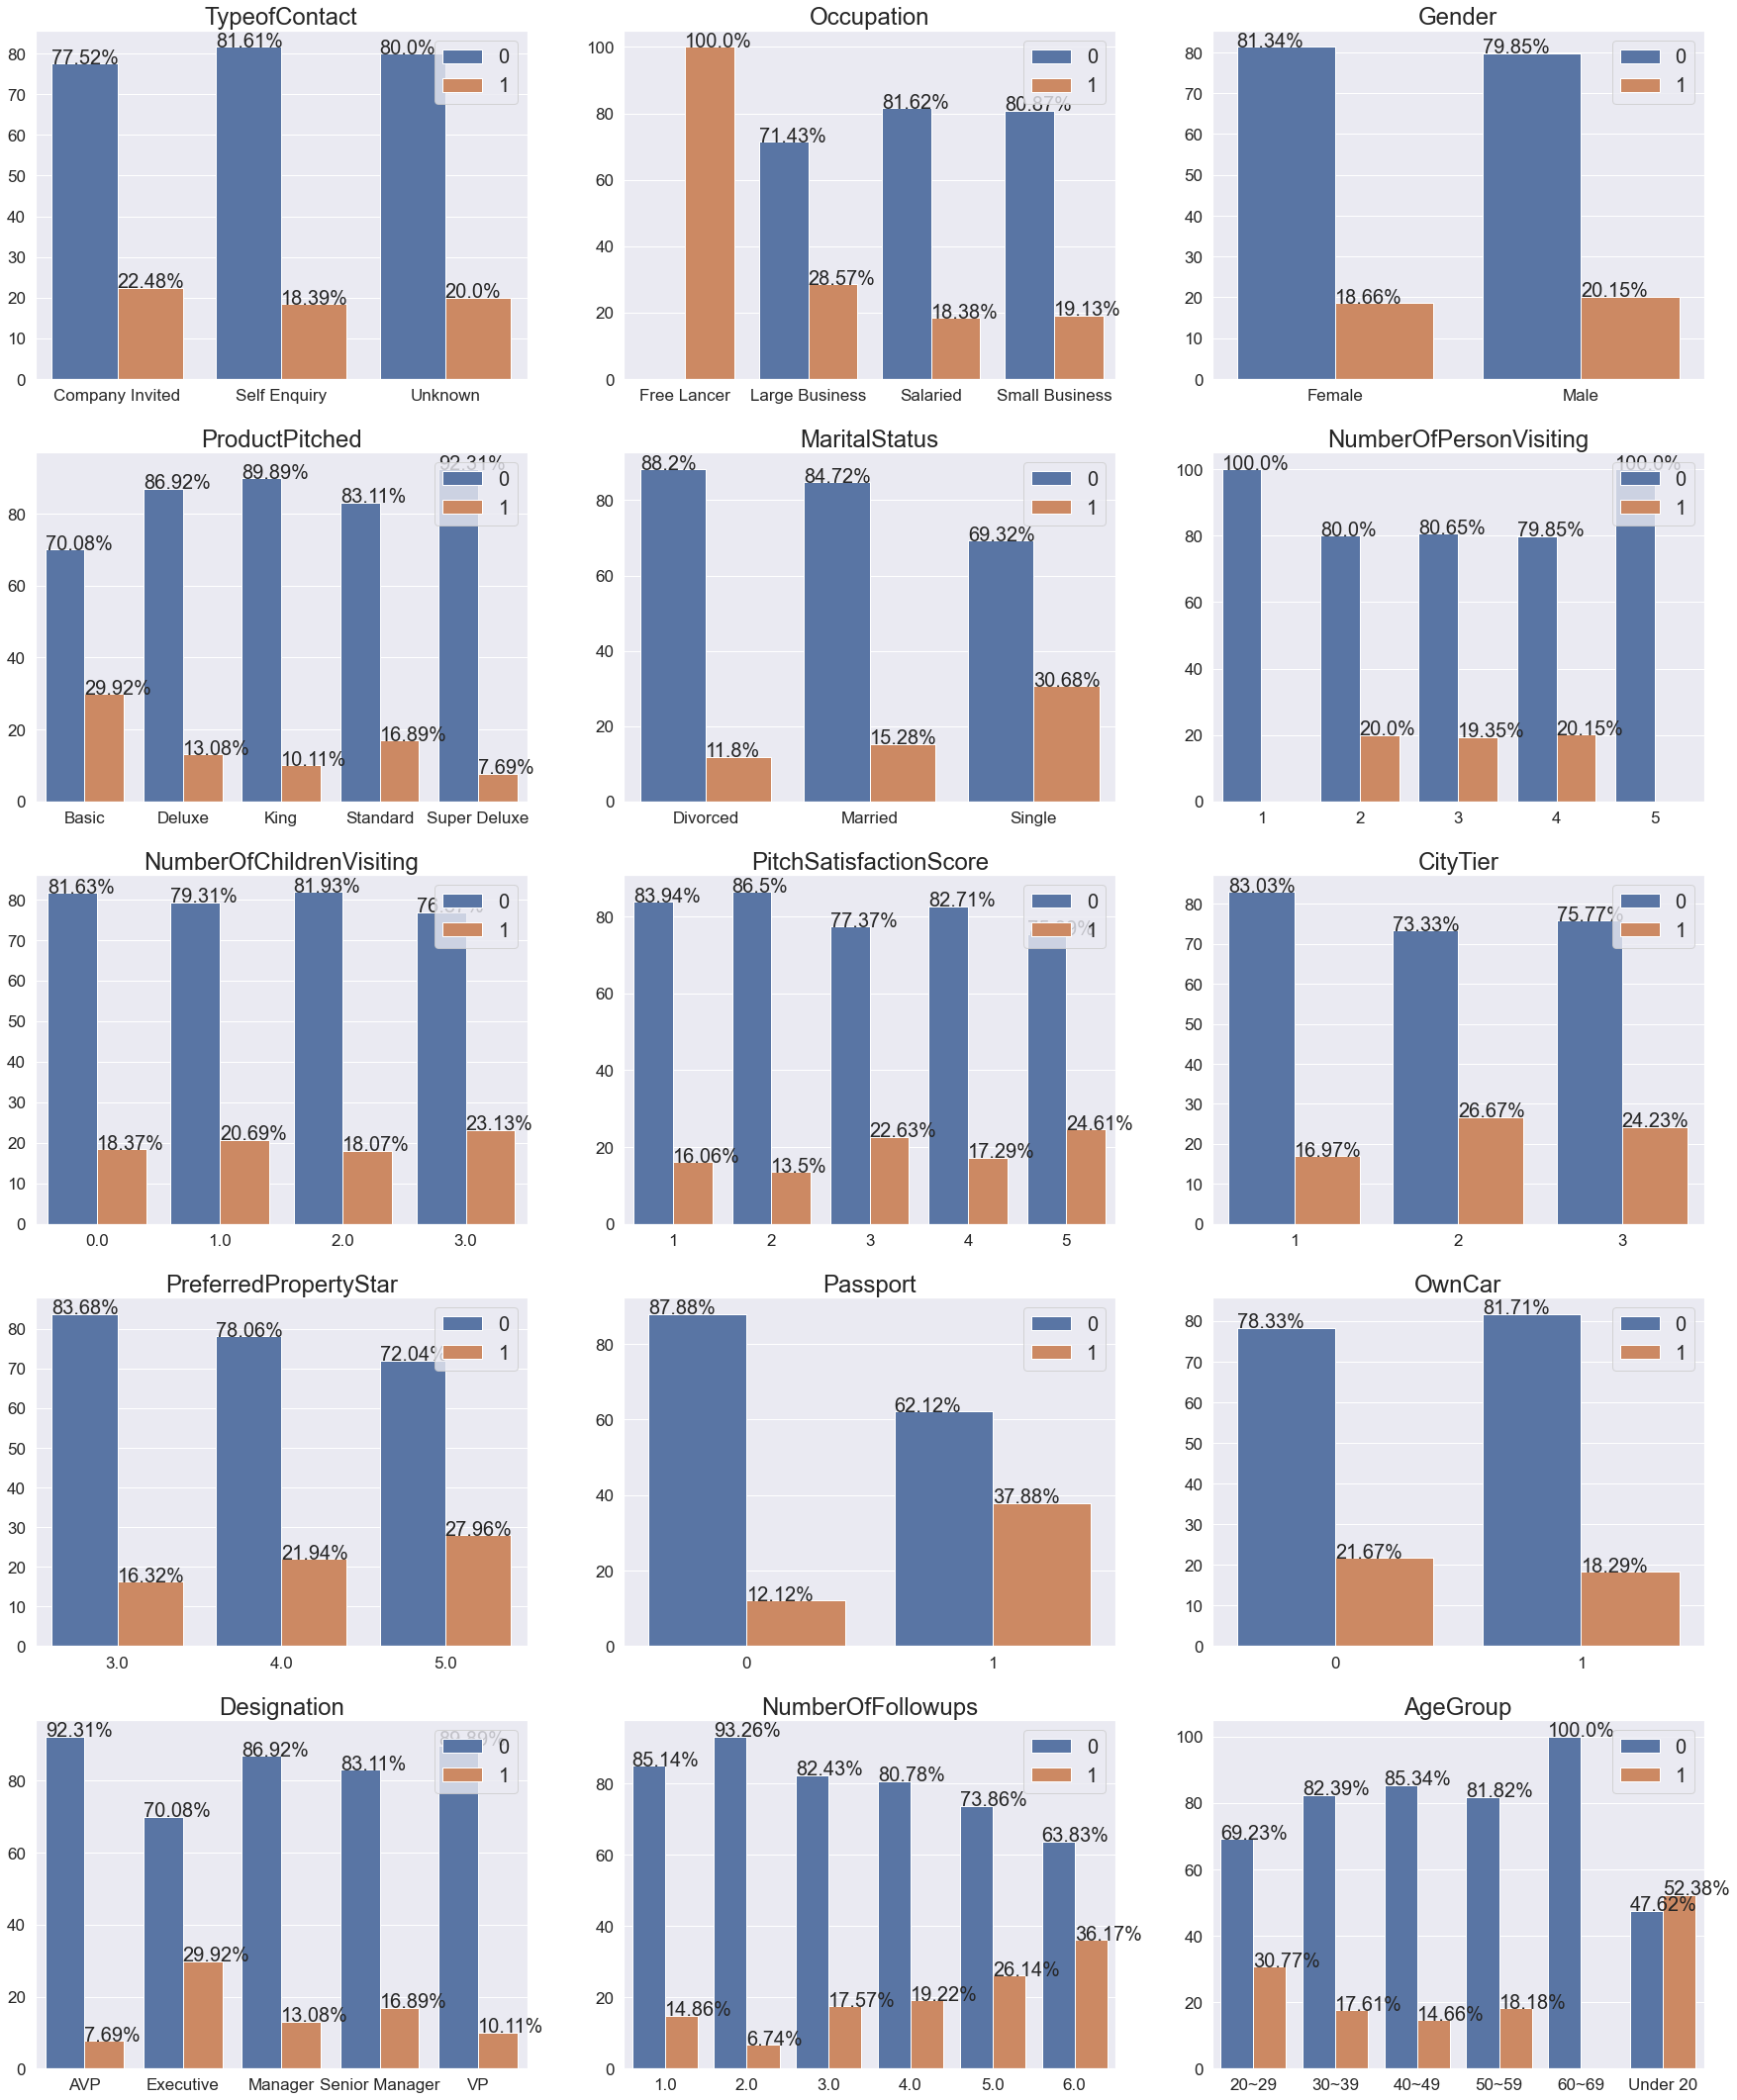

In [36]:
fig, axes = plt.subplots(5, 3, figsize=(25,30))

sns.set(font_scale=2)

sns.barplot(x='TypeofContact',y='percent', hue='ProdTaken', data=df, ax=axes[0][0]).set(title='TypeofContact')
sns.barplot(x='Occupation',y='percent1', hue='ProdTaken', data=df1, ax=axes[0][1]).set(title='Occupation')
sns.barplot(x='Gender',y='percent2', hue='ProdTaken', data=df2, ax=axes[0][2]).set(title='Gender')
sns.barplot(x='ProductPitched',y='percent3', hue='ProdTaken', data=df3, ax=axes[1][0]).set(title='ProductPitched')
sns.barplot(x='MaritalStatus',y='percent4', hue='ProdTaken', data=df4, ax=axes[1][1]).set(title='MaritalStatus')
sns.barplot(x='NumberOfPersonVisiting',y='percent5', hue='ProdTaken', data=df5, ax=axes[1][2]).set(title='NumberOfPersonVisiting')
sns.barplot(x='NumberOfChildrenVisiting',y='percent6', hue='ProdTaken', data=df6, ax=axes[2][0]).set(title='NumberOfChildrenVisiting')
sns.barplot(x='PitchSatisfactionScore',y='percent7', hue='ProdTaken', data=df7, ax=axes[2][1]).set(title='PitchSatisfactionScore')
sns.barplot(x='CityTier',y='percent8', hue='ProdTaken', data=df8, ax=axes[2][2]).set(title='CityTier')
sns.barplot(x='PreferredPropertyStar',y='percent9', hue='ProdTaken', data=df9, ax=axes[3][0]).set(title='PreferredPropertyStar')
sns.barplot(x='Passport',y='percent10', hue='ProdTaken', data=df10, ax=axes[3][1]).set(title='Passport')
sns.barplot(x='OwnCar',y='percent11', hue='ProdTaken', data=df11, ax=axes[3][2]).set(title='OwnCar')
sns.barplot(x='Designation',y='percent12', hue='ProdTaken', data=df12, ax=axes[4][0]).set(title='Designation')
sns.barplot(x='NumberOfFollowups',y='percent13', hue='ProdTaken', data=df13, ax=axes[4][1]).set(title='NumberOfFollowups')
sns.barplot(x='AgeGroup',y='percent14', hue='ProdTaken', data=df14, ax=axes[4][2]).set(title='AgeGroup')

for i in np.arange(0,5):
    for j in np.arange(0,3):
        axes[i][j].set(ylabel=None)
        axes[i][j].set(xlabel=None)
        axes[i][j].tick_params(labelsize=17)
        axes[i][j].legend(loc='upper right',fontsize='20')
        total = len(train)
        patches = axes[i][j].patches
        for p in axes[i][j].patches:
            txt = str(p.get_height().round(2)) + '%'
            txt_x = p.get_x() 
            txt_y = p.get_height()
            axes[i][j].text(txt_x,txt_y,txt,fontsize='20')
            
plt.tight_layout()
plt.show()

### It is now easier to see the application rate for each category.
* TypeofContact: Company Invited had the highest application rate. Next is the unaggregated Unknown.
* Occupation: All Free Lancers have applied. Next, Large Business had the highest application rate, and Salaried had the lowest.
* Gender: Male and female application rates are similar, but we can see that males are slightly higher.
* ProductPitched: Basic has the highest application rate. Super Deluxe has the lowest application rate.
* MaritalStatus: The application rate for singles is the highest.
* NumberOfPersonVisiting: When the total number of people was 1 or 5, no one applied. Other than that, there's not much difference.
* NumberOfChildrenVisiting: No significant difference is seen
* PitchSatisfactionScore: Presentation satisfaction does not seem to show a significant difference. However, when the satisfaction level is 3 and 5, the application rate is relatively high.
* CityTier: When the rating of the city you live in is 1, the application rate is relatively low.
* PreferredPropertyStar: The higher the property rating of the preferred hotel, the higher the application rate.
* Passport: Passport holders definitely have a high application rate.
* OwnCar: The application rate for non-car owners is slightly higher.
* Designation: Executive has the highest application rate, and AVP has the lowest application rate.
* NumberOfFollowups: The follow-up is a bit unusual. The second follow-up is worse than the first. However,if the follow up is consistent, there is an increase in the application rate.
* AgeGroup: More than half of those under the age of 20 applied, and those in their 20s also showed a high application rate. The age group with the lowest application rate is in their 60s.

# 6. Correlation
* We will check the correlation of each feature.
* Before that, let's do Label Encoding for categorical data: Integers are assigned to each category. (ex : Male : 0, Female : 1)

In [37]:
from sklearn.preprocessing import LabelEncoder

items =  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'AgeGroup']
train1 = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train1[i])
    train1[i] = encoder.transform(train1[i])

train1

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,AgeGroup
0,1,28.0,0,1,10.0,3,1,3,4.0,0,...,1,3.0,0,1,0,1.0,1,20384.0,0,0
1,2,34.0,1,3,14.0,3,0,2,4.0,1,...,2,1.0,1,5,1,0.0,2,19599.0,1,1
2,3,45.0,0,1,14.0,2,1,2,3.0,1,...,1,2.0,0,4,1,0.0,2,22295.0,0,2
3,4,29.0,0,1,7.0,3,1,3,5.0,0,...,1,3.0,0,4,0,1.0,1,21274.0,1,0
4,5,42.0,1,3,6.0,2,1,2,3.0,1,...,0,2.0,0,3,1,0.0,2,19907.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,...,2,2.0,0,1,1,2.0,1,20723.0,0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,...,0,1.0,0,5,1,1.0,0,31595.0,0,2
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,...,0,7.0,0,2,1,2.0,1,21651.0,0,1
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,...,1,3.0,0,1,1,2.0,2,22218.0,0,0


### First, let's plot a heatmap and figure out the correlation.
* The first thing you notice is the correlation of ProductPitched. The highest ones are MonthlyIncome, and Age and Designation. It seems that there is a difference in the products presented by income, age, and position.
* Obviously, NumberOfPersonVisiting and NumberOfChildrenVisiting show a high correlation, and AgeGroup also shows a high correlation with Age.
* Our target, Prodtaken does not show a high correlation with any feature. However, Passport, MaritalStatus, and MonthlyIncome show relatively good correlations.

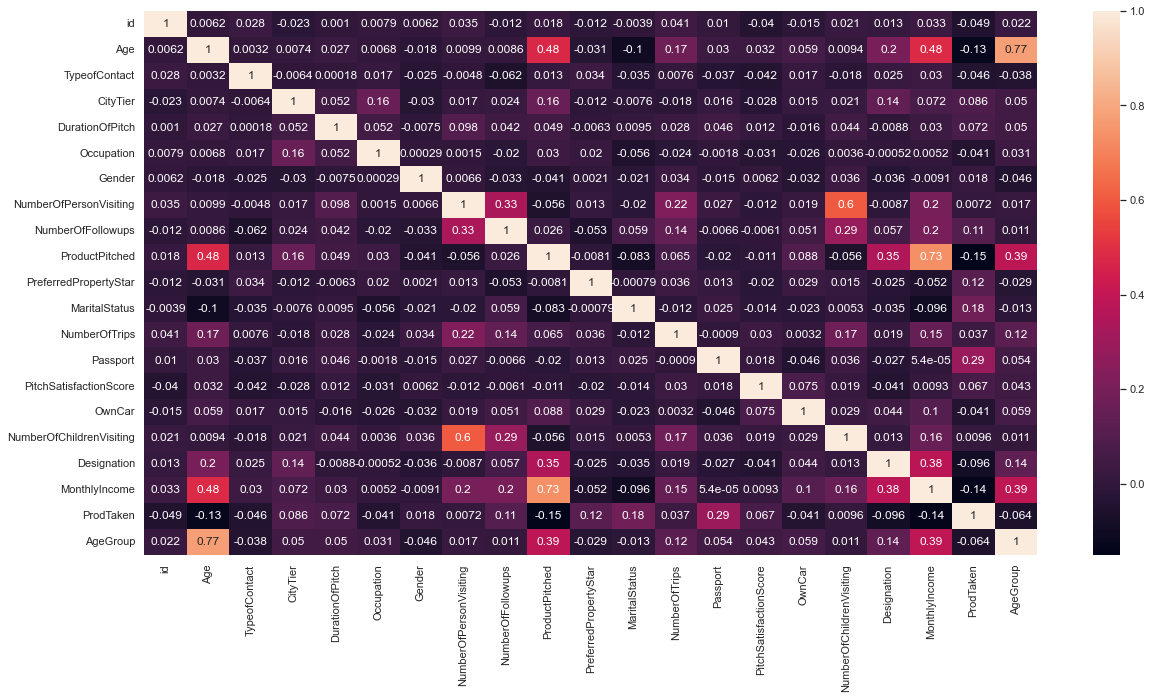

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(),annot=True)
plt.show()

# 7. More detailed analysis
### So far, we've only looked at the direct relationship between certain features and our interest, ProdTaken. However, if you view multiple features simultaneously, you can gain new insights. Therefore, we will now look at certain features along with other features. (The data before label encoding is used.)
* Since we want to know who is more likely to apply for a travel package, we will only look at the data that applied for a travel package (ProdTaken = 1).
* Additionally, for easier visualization, we will divide DurationOfPitch, MonthlyIncome and NumberOfTrips into different categories.

In [39]:
train['PitchLength']='NONE'
train.loc[train['DurationOfPitch'] < 10,'PitchLength']='Under 10'
train.loc[(train['DurationOfPitch'] >= 10) & (train['DurationOfPitch'] < 20),'PitchLength']='10~19'
train.loc[(train['DurationOfPitch'] >= 20) & (train['DurationOfPitch'] < 30),'PitchLength']='20~29'
train.loc[(train['DurationOfPitch'] >= 30) & (train['DurationOfPitch'] < 40),'PitchLength']='30~39'
train.loc[(train['DurationOfPitch'] >= 40) ,'PitchLength']='More than 40'

train['Income']='NONE'
train.loc[train['MonthlyIncome'] < 10000,'Income']='Under 10000'
train.loc[(train['MonthlyIncome'] >= 10000) & (train['MonthlyIncome'] < 15000),'Income']='10000~15000'
train.loc[(train['MonthlyIncome'] >= 15000) & (train['MonthlyIncome'] < 20000),'Income']='15000~20000'
train.loc[(train['MonthlyIncome'] >= 20000) & (train['MonthlyIncome'] < 25000),'Income']='20000~25000'
train.loc[(train['MonthlyIncome'] >= 25000) & (train['MonthlyIncome'] < 30000),'Income']='25000~30000'
train.loc[(train['MonthlyIncome'] >= 30000) ,'Income']='More than 30000'

train['Trip']='NONE'
train.loc[train['NumberOfTrips'] < 2,'Trip']='0~2'
train.loc[(train['NumberOfTrips'] >= 2) & (train['NumberOfTrips'] < 4),'Trip']='2~4'
train.loc[(train['NumberOfTrips'] >= 4) ,'Trip']='Above 4'

taken = train[train['ProdTaken'] == 1]

### Since the visualization is too long to show all the features, I will check them all and visualize the most meaningful insights.
* Since it is difficult to determine which categories are effective when visualized in terms of customer count, let's turn it into a percentage and see the percentage of customers by category who have requested a travel product.

## 7.1) Age
* Insights that were meaningful by age group

In [40]:
df = taken.groupby('AgeGroup')['TypeofContact'].value_counts(normalize=True)
df = df.mul(100).rename('percent').reset_index()
df1 = taken.groupby('AgeGroup')['CityTier'].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent1').reset_index()
df2 = taken.groupby('AgeGroup')['PitchLength'].value_counts(normalize=True)
df2 = df2.mul(100).rename('percent2').reset_index()
df3 = taken.groupby('AgeGroup')['Occupation'].value_counts(normalize=True)
df3 = df3.mul(100).rename('percent3').reset_index()
df4 = taken.groupby('AgeGroup')['ProductPitched'].value_counts(normalize=True)
df4 = df4.mul(100).rename('percent4').reset_index()
df5 = taken.groupby('AgeGroup')['Income'].value_counts(normalize=True)
df5 = df5.mul(100).rename('percent5').reset_index()
df6 = taken.groupby('AgeGroup')['PreferredPropertyStar'].value_counts(normalize=True)
df6 = df6.mul(100).rename('percent6').reset_index()
df7 = taken.groupby('AgeGroup')['Trip'].value_counts(normalize=True)
df7 = df7.mul(100).rename('percent7').reset_index()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

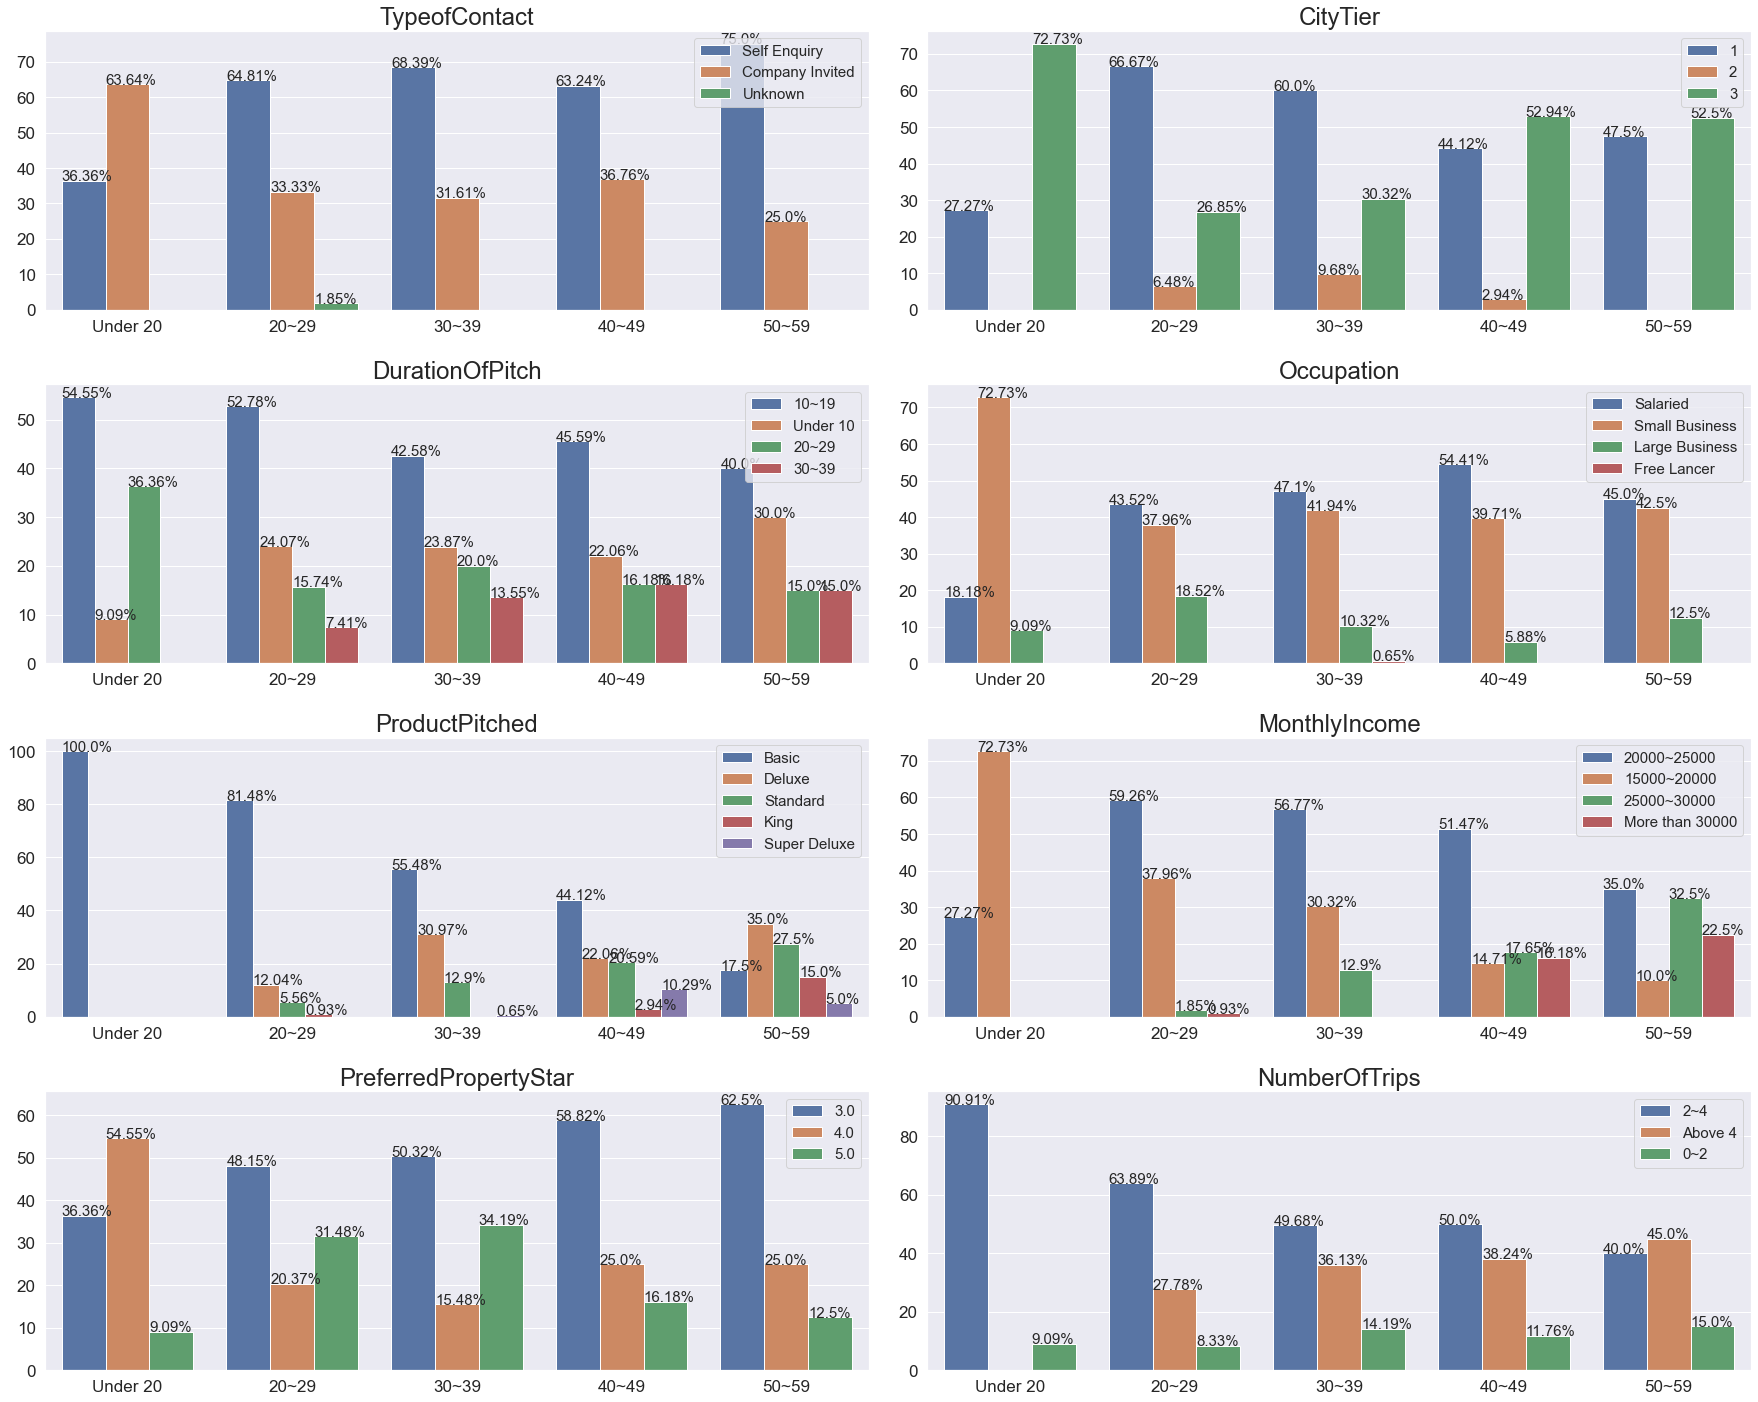

In [41]:
fig, axes = plt.subplots(4, 2, figsize=(25,20))

order = ['Under 20','20~29','30~39','40~49','50~59']
sns.set(font_scale=2)
sns.barplot(x='AgeGroup',y='percent', hue='TypeofContact', data=df, ax=axes[0][0],order=order).set(title='TypeofContact')
sns.barplot(x='AgeGroup',y='percent1', hue='CityTier', data=df1, ax=axes[0][1],order=order).set(title='CityTier')
sns.barplot(x='AgeGroup',y='percent2', hue='PitchLength', data=df2, ax=axes[1][0],order=order).set(title='DurationOfPitch')
sns.barplot(x='AgeGroup',y='percent3', hue='Occupation', data=df3, ax=axes[1][1],order=order).set(title='Occupation')
sns.barplot(x='AgeGroup',y='percent4', hue='ProductPitched', data=df4, ax=axes[2][0],order=order).set(title='ProductPitched')
sns.barplot(x='AgeGroup',y='percent5', hue='Income', data=df5, ax=axes[2][1],order=order).set(title='MonthlyIncome')
sns.barplot(x='AgeGroup',y='percent6', hue='PreferredPropertyStar', data=df6, ax=axes[3][0],order=order).set(title='PreferredPropertyStar')
sns.barplot(x='AgeGroup',y='percent7', hue='Trip', data=df7, ax=axes[3][1],order=order).set(title='NumberOfTrips')

for i in np.arange(0,4):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel=None)
        axes[i][j].set(xlabel=None)
        axes[i][j].tick_params(labelsize=17)
        axes[i][j].legend(loc='upper right',fontsize='15')
        total = len(train)
        patches = axes[i][j].patches
        for p in axes[i][j].patches:
            txt = str(p.get_height().round(2)) + '%'
            txt_x = p.get_x() 
            txt_y = p.get_height()
            axes[i][j].text(txt_x,txt_y,txt,fontsize='15')

           
plt.tight_layout()
plt.show()

### Certainly, by combining more features, new insights emerge.
* TypeofContact: Unlike other age groups, people in their 20s and younger recognized travel products through company promotion. I guess it's because they don't have enough search experience yet. Also, as the age increases, the preference for Self Inquiry increases, and as the age decreases,the preference for Company Invited increases.
* CityTier: There were only 20's, 30's, and 40's in the age group with the 2nd grade residence. In addition, those in their 20s and 30s had a higher application rate in the 3rd grade, and those in their 20s, 40s and 50s had a higher application rate in the 1st grade.
* DurationOfPitch: All age groups had the highest application rate when the presentation period was 10-19. However, unlike other age groups, those in their 20s showed a very low application rate when the presentation period was 10 or less.
* Occupation: All age groups except those under 20 showed the highest application rate when Salaried. Those under 20s show a high application rate when it comes to Small Business.
* ProductPitched: The application rate when presented with Basic decreases as age increases. Instead, for Deluxe, Super Deluxe, and King, the rate of application increases as age increases. It seems to have something to do with income. Applicants under the age of 20 were offered only Basic.
* MonthlyIncome: Only for those under the age of 20, the majority of applicants' monthly income is between 15,000 and 20,000. Other than that, as the age increases, the number of applicants with higher monthly income increases. It seems that it is difficult for those in their 20s to receive an average high monthly income.
* PreferredPropertyStar: As age increases, the rate of applications for rating 3 accommodations increases. The most preferred age group for rating 5 is those in their 30s.
* NumberOfTrips: As age increases, the application rate decreases for customers who average 2 to 4 trips per year, and the application rate increases for customers with 2 or fewer trips per year. Those under the age of 20 did not apply when the average number of trips per year was 4 or more.

### 2) TypeofContact
* Insights that were meaningful by travel product recognition route

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


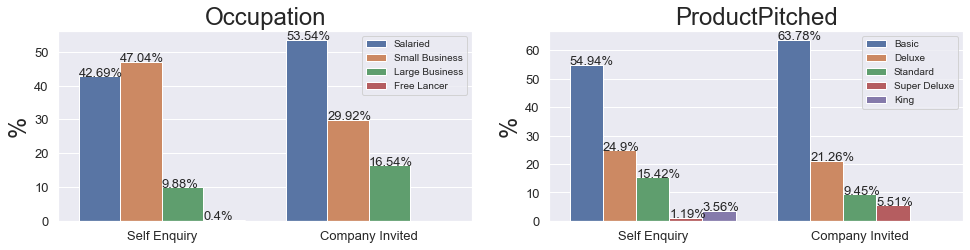

In [42]:
df = taken.groupby('TypeofContact')['Occupation'].value_counts(normalize=True)
df = df.mul(100).rename('percent').reset_index()
df1 = taken.groupby('TypeofContact')['ProductPitched'].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent1').reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14,4))

order = ['Self Enquiry','Company Invited']
sns.barplot(x='TypeofContact',y='percent', hue='Occupation', data=df, ax=axes[0],order=order).set(title='Occupation')
sns.barplot(x='TypeofContact',y='percent1', hue='ProductPitched', data=df1, ax=axes[1],order=order).set(title='ProductPitched')

for i in np.arange(0,2):
    axes[i].set(ylabel='%')
    axes[i].set(xlabel=None)
    axes[i].tick_params(labelsize=13)
    axes[i].legend(loc='upper right',fontsize='10')
    total = len(taken)
    patches = axes[i].patches
    for p in axes[i].patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        axes[i].text(txt_x,txt_y,txt,fontsize='13')
            
plt.tight_layout()
plt.show()

* Occupation: In the case of Self Inquiry, Small Business applied for more travel products than Salaried, while Salaried applied the most for Company Invited.
* ProductPitched: Also, in the case of Self Inquiry, the salesperson suggested all products, but in the case of Company Invited, the salesperson did not suggest King. The connection between the two seems hard to find, and I think I need to look more closely.

### 2) CityTier별

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


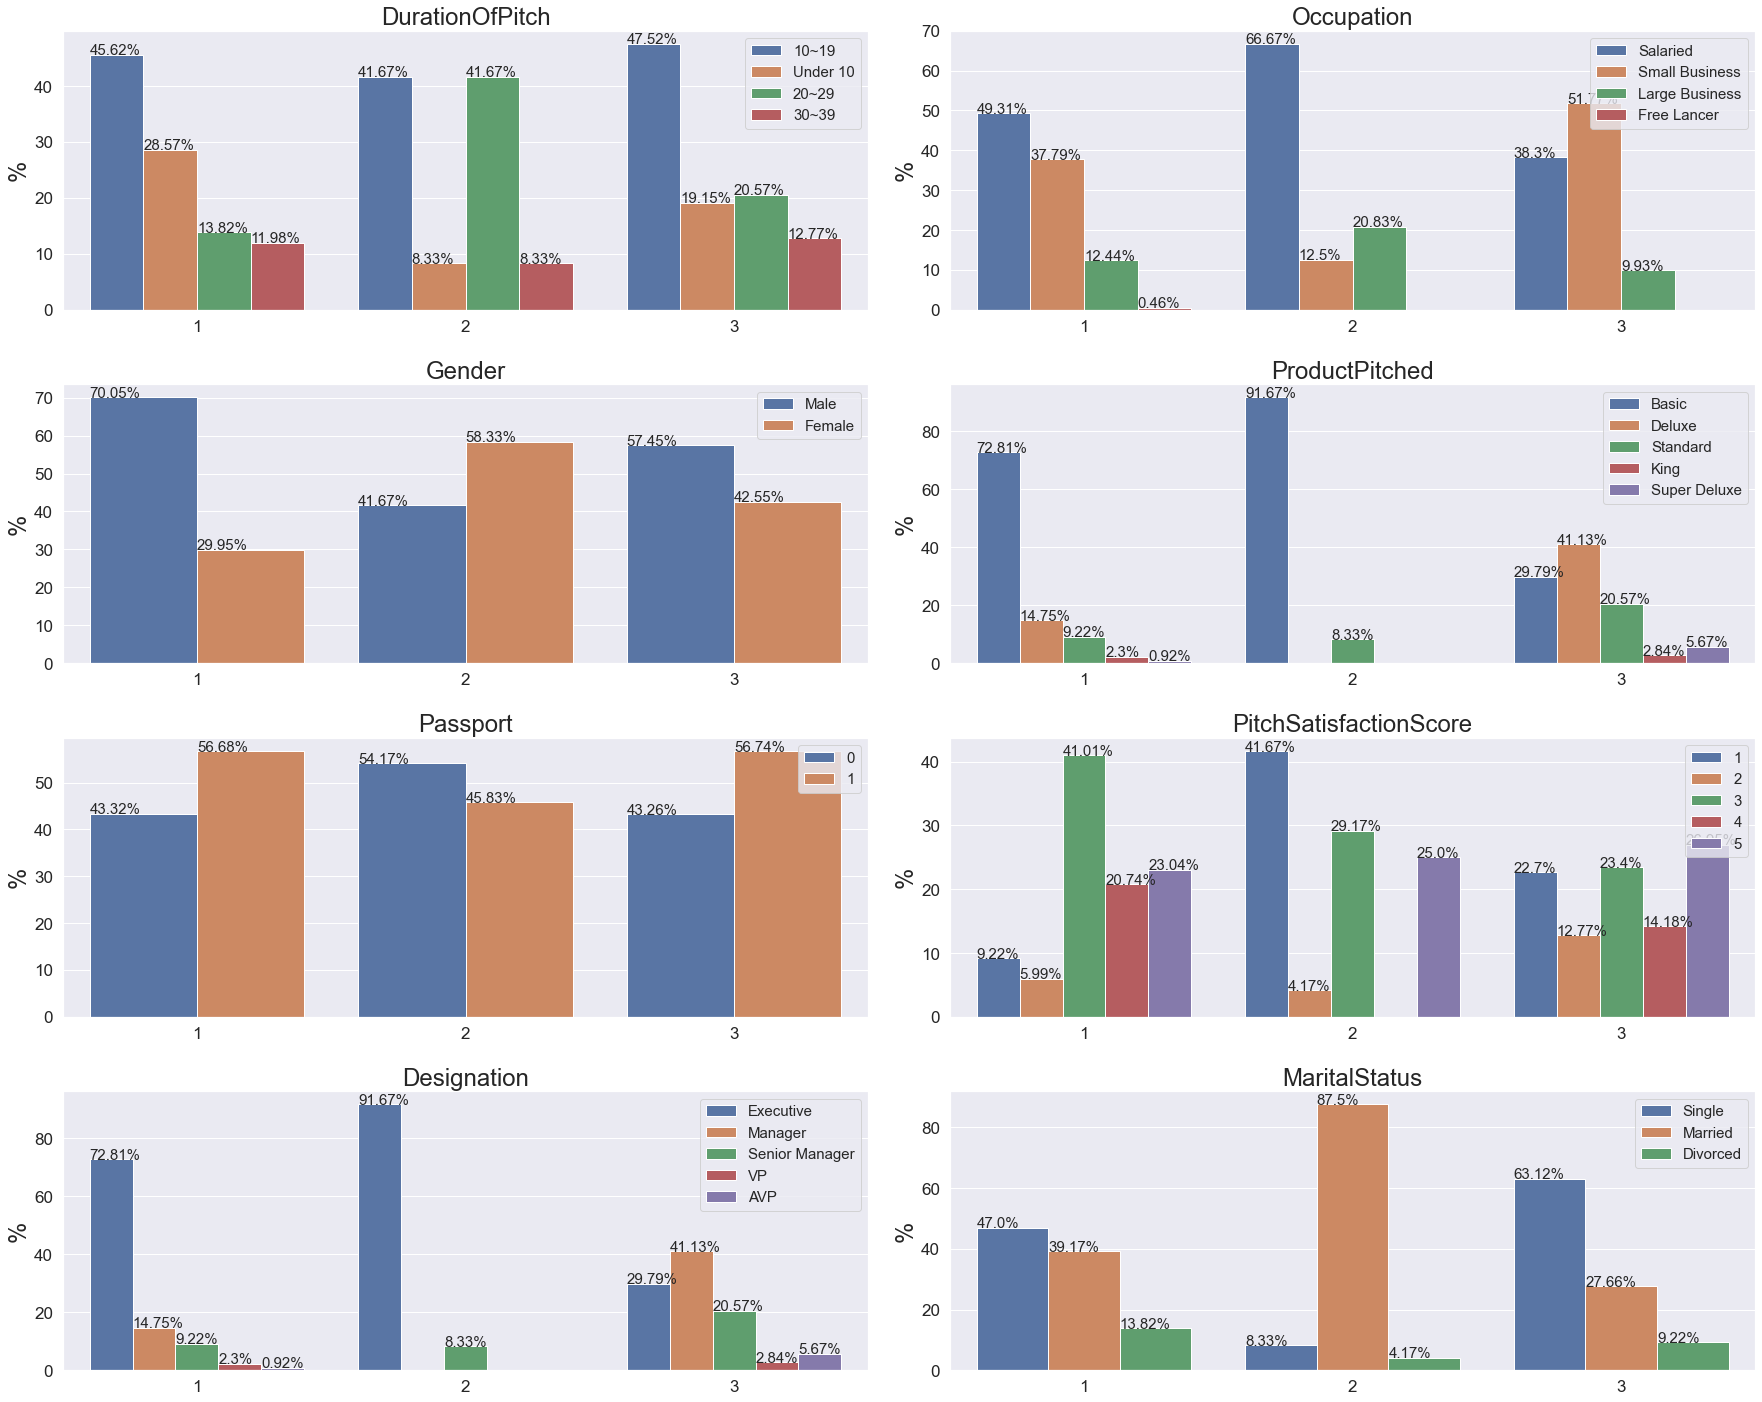

In [43]:
df = taken.groupby('CityTier')['PitchLength'].value_counts(normalize=True)
df = df.mul(100).rename('percent').reset_index()
df1 = taken.groupby('CityTier')['Occupation'].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent1').reset_index()
df2 = taken.groupby('CityTier')['Gender'].value_counts(normalize=True)
df2 = df2.mul(100).rename('percent2').reset_index()
df3 = taken.groupby('CityTier')['ProductPitched'].value_counts(normalize=True)
df3 = df3.mul(100).rename('percent3').reset_index()
df4 = taken.groupby('CityTier')['Passport'].value_counts(normalize=True)
df4 = df4.mul(100).rename('percent4').reset_index()
df5 = taken.groupby('CityTier')['PitchSatisfactionScore'].value_counts(normalize=True)
df5 = df5.mul(100).rename('percent5').reset_index()
df6 = taken.groupby('CityTier')['Designation'].value_counts(normalize=True)
df6 = df6.mul(100).rename('percent6').reset_index()
df7 = taken.groupby('CityTier')['MaritalStatus'].value_counts(normalize=True)
df7 = df7.mul(100).rename('percent7').reset_index()

fig, axes = plt.subplots(4, 2, figsize=(25,20))

order = [1,2,3]
sns.set(font_scale=2)
sns.barplot(x='CityTier',y='percent', hue='PitchLength', data=df, ax=axes[0][0],order=order).set(title='DurationOfPitch')
sns.barplot(x='CityTier',y='percent1', hue='Occupation', data=df1, ax=axes[0][1],order=order).set(title='Occupation')
sns.barplot(x='CityTier',y='percent2', hue='Gender', data=df2, ax=axes[1][0],order=order).set(title='Gender')
sns.barplot(x='CityTier',y='percent3', hue='ProductPitched', data=df3, ax=axes[1][1],order=order).set(title='ProductPitched')
sns.barplot(x='CityTier',y='percent4', hue='Passport', data=df4, ax=axes[2][0],order=order).set(title='Passport')
sns.barplot(x='CityTier',y='percent5', hue='PitchSatisfactionScore', data=df5, ax=axes[2][1],order=order).set(title='PitchSatisfactionScore')
sns.barplot(x='CityTier',y='percent6', hue='Designation', data=df6, ax=axes[3][0],order=order).set(title='Designation')
sns.barplot(x='CityTier',y='percent7', hue='MaritalStatus', data=df7, ax=axes[3][1],order=order).set(title='MaritalStatus')

for i in np.arange(0,4):
    for j in np.arange(0,2):
        axes[i][j].set(ylabel='%')
        axes[i][j].set(xlabel=None)
        axes[i][j].tick_params(labelsize=17)
        axes[i][j].legend(loc='upper right',fontsize='15')
        total = len(train)
        patches = axes[i][j].patches
        for p in axes[i][j].patches:
            txt = str(p.get_height().round(2)) + '%'
            txt_x = p.get_x() 
            txt_y = p.get_height()
            axes[i][j].text(txt_x,txt_y,txt,fontsize='15')

           
plt.tight_layout()
plt.show()

#### CityTier의 경우에는 1등급과 3등급이 유사한 모습을 보이고, 2등급은 다소 독보적인 모습을 보입니다.
* DurationOfPitch: Unlike the other tiers, Tier 2 residents have a very low application rate when the presentation period is 10 or less.
* Occupation: Tier 2 residents had a much higher application rate for Salaried than other Tier residents, and very little for Small Business.
* Gender: Unlike residents of other tiers, Tier 2 residents had a higher rate of female applications.
* ProductPitched: For applicants residing in Tier 2, only Basic and Deluxe were offered.
* Passport: Tier 2 residents had a higher rate of applications when they did not hold a passport.
* PitchSatisfactionScore: Tier 1 residents applied most when the satisfaction level was 3, Tier 2 residents applied most when the satisfaction level was 1, and Tier 3 residents applied most when the level of satisfaction was 5. Presentation satisfaction does not seem to have a significant impact on whether or not to apply. Among the applicants residing in Tier 2, there is no applicant with a Presentation Satisfaction rating of 4.
* Designation: Again, the same as the ProductPitched graph. There seems to be a relationship between Designation and ProductPitched.
* MaritalStatus: Unlike the other tiers, in Tier 2, married people applied much more.

### 3) Designation

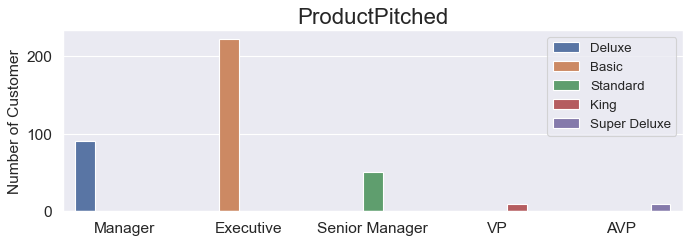

In [44]:
from matplotlib.pyplot import figure

figure(figsize=(10, 3), dpi=80)
order = ['Manager','Executive','Senior Manager','VP', 'AVP']

sns.countplot(x='Designation',hue='ProductPitched', data=taken, order=order).set_title('ProductPitched',fontdict= {'fontsize':20})
plt.legend(fontsize='12')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Customer', fontsize=14)

plt.show()

* ProductPitched: Now you can see why all the Designation and ProductPitched graphs are the same. All designation that applied were offered only one package each. However, as this phenomenon is so rare, I think that maybe the products were divided by designation from the beginning.

# 8. How to increase Holiday Package application rate?
* So, what should we do to increase the rate of application for travel products? Let's take a look at the insights we've gained so far.

### <font color='orange'>Let's aim for 20's and below!</font>
- The main customer base is in their 30s and 40s, but the 20s and younger showed a very high application rate. Among them, those in their 20s and younger show different characteristics from other age groups. Those in their 20s and younger preferred the company's publicity, preferred low-priced products, and were very sensitive to presentations. In addition to those in their 30s and 40s, if they target people in their 20s and younger than 20s, it seems that a higher application rate can be expected.

### <font color='orange'>Let's consider the taste of each age more!</font>
- ifferent age groups have different tastes. For example, being offered Basic is very effective for the younger age group, but the preference for Basic decreases as the age increases. Rather, it is more effective to suggest Standard or King.
- In addition, the younger the age, the higher the application rate when the average number of trips is low, and the higher the age, the higher the application rate when the average number of trips is high.
- As age increases, they prefer 3-star hotels and prefer Self Inquiry over Company Invited.
- In particular, people in their 30s are the main customers of this company. I think you need to understand the preferences of people in their 30s.

### <font color='orange'>Let's get to know the Tier 2 city residents!</font>
- Residents of Tier 2 cities are relatively few, but very different from other residents. For example, non-passport holders, women, and married people had higher rates of application. It is necessary to understand the grade of the customer's residential city well, and to set up a strategy that is differentiated from other cities in the case of the Tier 2 residents.

### <font color='orange'>Lets's improve promotion by the company!</font>
- The application rate was higher when they encountered the company's promotion rather than recognizing the travel product themselves. If you invest more in publicity, it seems that you can get good results.

### <font color='orange'>Suggest more Basic products!</font>
- The majority of customers preferred to be offered Basic. Referring to this, we can increase the application rate by suggesting more Basic. But here's a fun fact. So far, it appears the company has only offered one product for each position. For more sales, it seems good to propose products by excluding positions.

### <font color='orange'>Let's increase the number of unmarried customers!</font>
- The main customer base is married, but singles had the highest application rate. It would be nice to expand the main customer base to not only married people but also single people.

### <font color='orange'>Make sure to check whether customer has a passport or not!</font>
- Passport holders make about three times as many applications as non-passport holders. It would be nice to promote more actively to passport holders.

### <font color='orange'>Let's aim for customers with the position of Executive!</font>
- Executives showed an approximately 10% higher application rate than other positions..

### <font color='orange'>Let's keep following up!</font>
- With current data, lengthy follow-ups are very rare. However, the more you follow up, the higher the application rate. Six follow-ups had more than twice as many applications as follow-up one. However, it should be noted that the second follow-up is worse than the first.

### <font color='orange'>Let's increase 5-star hotel packages!</font>
- The highest application rate was when the preferred hotel rating was 5. This phenomenon becomes more pronounced with increasing age. In addition, the most preferred age group for level 5 is those in their 30s.
